In [4]:
from data import ADNIMRIDataset
from utils import cross_validate
from literature_models import J_CNN3DModel, JAL_model
from torch.utils.data import Subset, DataLoader
import pandas as pd
import ants
from data_exp_utils import plot_mri_jsm_overlay_views_loaded

In [2]:
dataset = pd.read_csv("jacobian_first_folds_dis.csv")

In [4]:
train_dataset = ADNIMRIDataset(
    image_paths=dataset.linear_registered_path,
    image_labels=dataset.DIAGNOSIS,
    jsm_paths=dataset.syn_jacobian.tolist(),
    input_type="cross_attention",
    apply_random_rotation=True,
    max_rotation=3,
    thereshold = 0.2
)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)


In [5]:
import torch

for i, batch_data in enumerate(train_loader):
    # Example: input_type = "attention" or "cross_attention"
    img_tensor, jsm_tensor, label = batch_data
    print("MRI shape:", img_tensor.shape)
    print("JSM shape:", jsm_tensor.shape)
    print("Label:", label)

    # We'll just break after the first sample
    break


MRI shape: torch.Size([1, 1, 182, 218, 182])
JSM shape: torch.Size([1, 1, 182, 218, 182])
Label: tensor([3])


/projects/florence_echo/Shijia/ADNI/Jacobian_method/Jacobian_method/data_exp_utils.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


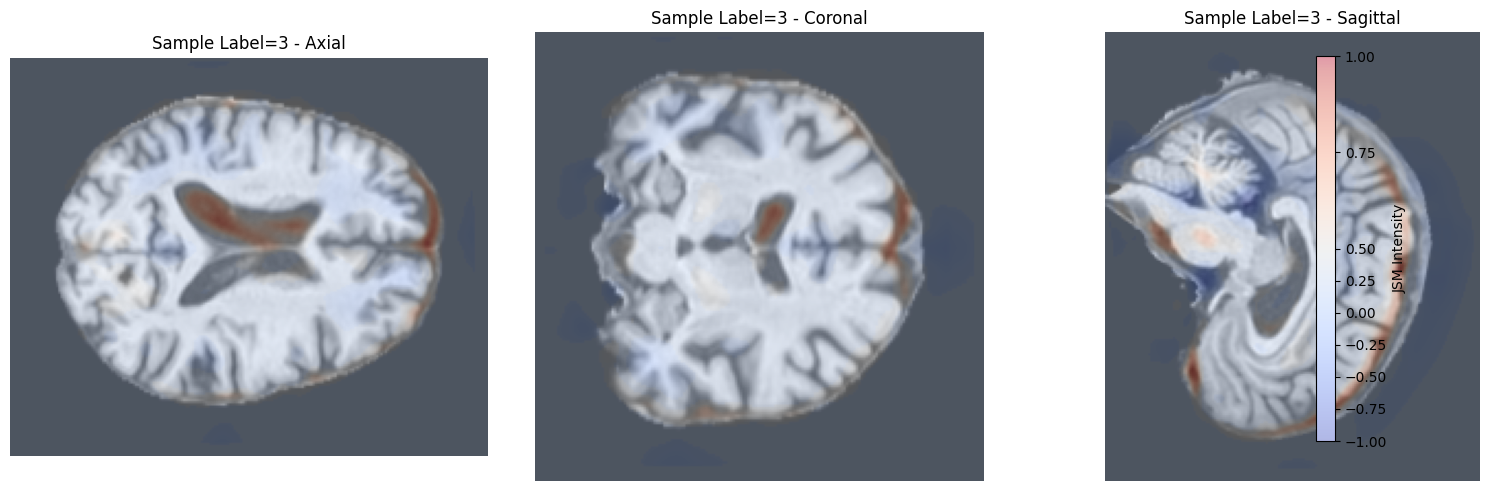

In [6]:
# Example usage
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Grab the first sample
img_tensor, jsm_tensor, label = next(iter(train_loader))

# Convert to ANTs
img_np = img_tensor.squeeze().numpy()  # [D, H, W]
jsm_np = jsm_tensor.squeeze().numpy()  # [D, H, W]

mri_ants = ants.from_numpy(img_np)
jsm_ants = ants.from_numpy(jsm_np)

# Plot overlay
plot_mri_jsm_overlay_views_loaded(mri_ants, jsm_ants, title_prefix=f"Sample Label={label.item()}")


/projects/florence_echo/Shijia/ADNI/Jacobian_method/Jacobian_method/data_exp_utils.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


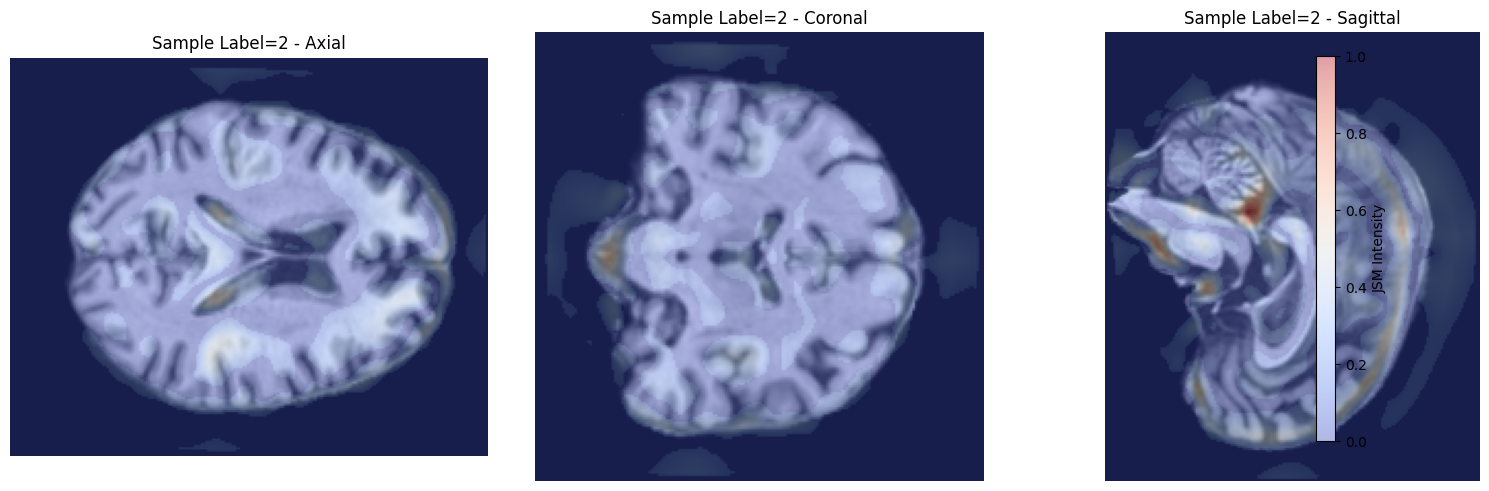

In [11]:
# Example usage
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Grab the first sample
img_tensor, jsm_tensor, label = next(iter(train_loader))

# Convert to ANTs
img_np = img_tensor.squeeze().numpy()  # [D, H, W]
jsm_np = jsm_tensor.squeeze().numpy()  # [D, H, W]

mri_ants = ants.from_numpy(img_np)
jsm_ants = ants.from_numpy(jsm_np)

# Plot overlay
plot_mri_jsm_overlay_views_loaded(mri_ants, jsm_ants, title_prefix=f"Sample Label={label.item()}")


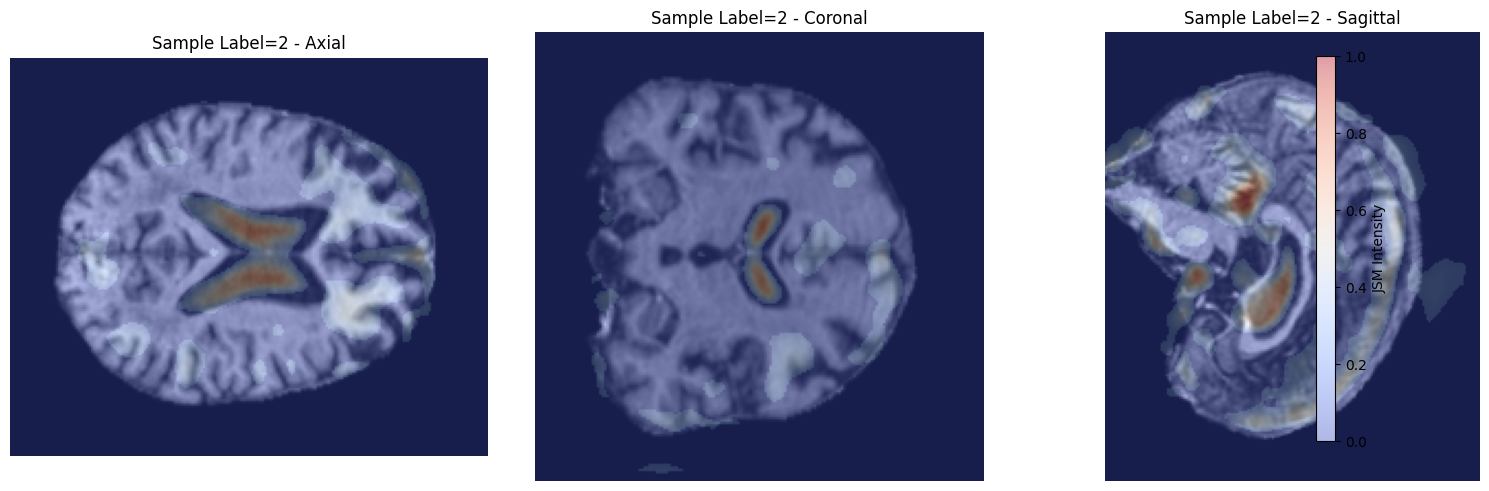

In [12]:
train_dataset = ADNIMRIDataset(
    image_paths=dataset.linear_registered_path,
    image_labels=dataset.DIAGNOSIS,
    jsm_paths=dataset.syn_jacobian.tolist(),
    input_type="cross_attention",
    apply_random_rotation=True,
    max_rotation=3,
    thereshold = 0.3
)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Example usage
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Grab the first sample
img_tensor, jsm_tensor, label = next(iter(train_loader))

# Convert to ANTs
img_np = img_tensor.squeeze().numpy()  # [D, H, W]
jsm_np = jsm_tensor.squeeze().numpy()  # [D, H, W]

mri_ants = ants.from_numpy(img_np)
jsm_ants = ants.from_numpy(jsm_np)

# Plot overlay
plot_mri_jsm_overlay_views_loaded(mri_ants, jsm_ants, title_prefix=f"Sample Label={label.item()}")

In [10]:
train_dataset = ADNIMRIDataset(
    image_paths=dataset.linear_registered_path,
    image_labels=dataset.DIAGNOSIS,
    jsm_paths=dataset.syn_jacobian.tolist(),
    input_type="cross_attention",
    apply_random_rotation=False,
    max_rotation=20
)


/tmp/ipykernel_3275134/3709214606.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


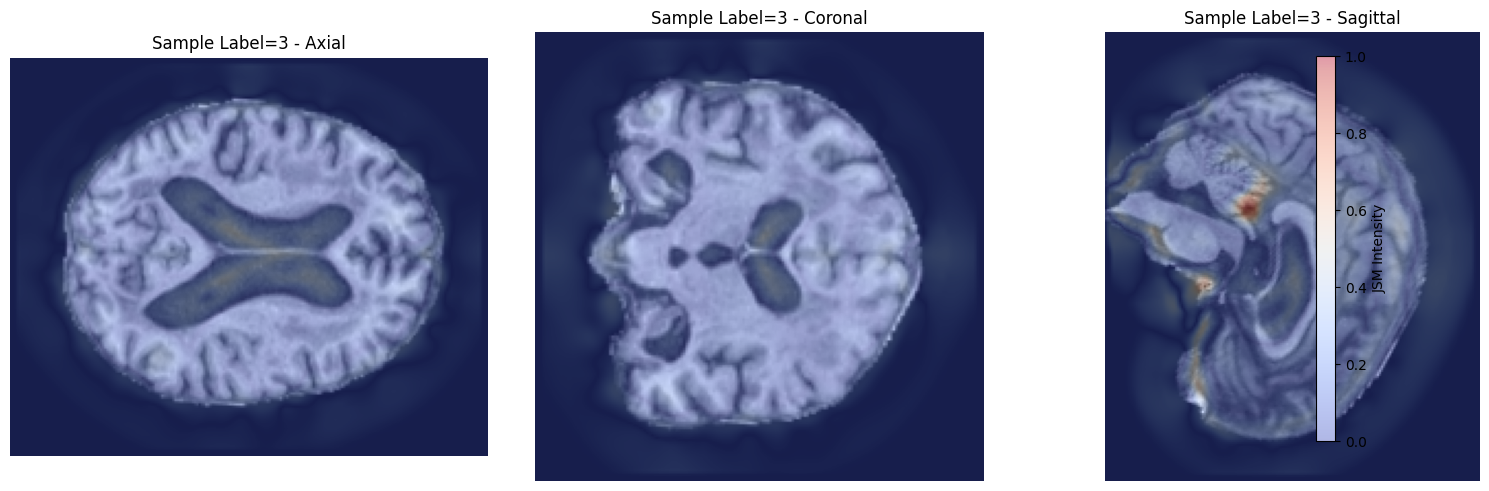

In [11]:
# Example usage
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Grab the first sample
img_tensor, jsm_tensor, label = next(iter(train_loader))

# Convert to ANTs
img_np = img_tensor.squeeze().numpy()  # [D, H, W]
jsm_np = jsm_tensor.squeeze().numpy()  # [D, H, W]

mri_ants = ants.from_numpy(img_np)
jsm_ants = ants.from_numpy(jsm_np)

# Plot overlay
plot_mri_jsm_overlay_views_loaded(mri_ants, jsm_ants, title_prefix=f"Sample Label={label.item()}")


In [5]:
dataset = pd.read_csv("jacobian_first_folds_dis.csv")

In [ ]:
cross_validate(
                model_class=None,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=20,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="cross_attention",
                cls_type="cn_vs_ad",
                batch_size = 16,
                fusion_type = "attend_only",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cross_att_new",
                input_type="cross_attention",
                thereshold=0.2,
                apply_rotation = True,
                max_rotation=1
                
            )

Starting Fold 1/5...
Using 4 GPUs


In [8]:
cross_validate(
                model_class=None,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=20,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="cross_attention",
                cls_type="cn_vs_ad",
                batch_size = 16,
                fusion_type = "attend_only",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cross_att_new",
                input_type="cross_attention",
                thereshold=0.2,
                apply_rotation = True,
                max_rotation=1
                
            )

Starting Fold 1/5...
Using 1 GPU or CPU
Epoch 1/20, Loss: 0.6936
Epoch 2/20, Loss: 0.6878
Epoch 3/20, Loss: 0.6816
Epoch 4/20, Loss: 0.6674
Epoch 5/20, Loss: 0.6385
Epoch 6/20, Loss: 0.6149
Epoch 7/20, Loss: 0.5462
Epoch 8/20, Loss: 0.5534
Epoch 9/20, Loss: 0.4896
Epoch 10/20, Loss: 0.4666
Epoch 11/20, Loss: 0.4810
Epoch 12/20, Loss: 0.4861
Epoch 13/20, Loss: 0.3874
Epoch 14/20, Loss: 0.3906
Epoch 15/20, Loss: 0.3948
Epoch 16/20, Loss: 0.2441
Epoch 17/20, Loss: 0.2165
Epoch 18/20, Loss: 0.1889
Epoch 19/20, Loss: 0.3191
Epoch 20/20, Loss: 0.2857
Fold 1 Metrics: AUC=0.9466, PR AUC=0.9499, Accuracy=0.8478, F1=0.8478, Precision=0.8482, Recall=0.8482
Starting Fold 2/5...
Using 1 GPU or CPU
Epoch 1/20, Loss: 0.6962
Epoch 2/20, Loss: 0.6931
Epoch 3/20, Loss: 0.6915
Epoch 4/20, Loss: 0.6865
Epoch 5/20, Loss: 0.6673
Epoch 6/20, Loss: 0.6412
Epoch 7/20, Loss: 0.6121
Epoch 8/20, Loss: 0.5854
Epoch 9/20, Loss: 0.5659
Epoch 10/20, Loss: 0.5520
Epoch 11/20, Loss: 0.4782
Epoch 12/20, Loss: 0.4656
Epo

'/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cross_att_new/cross_validation_results_affine_registered_cross_attention_cn_vs_ad_cross_attention.csv'

In [ ]:
cross_validate(
                model_class=None,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=20,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="cross_attention",
                cls_type="cn_vs_mci",
                batch_size = 16,
                fusion_type = "attend_only",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cross_att_new",
                input_type="cross_attention",
                thereshold=0.2,
                apply_rotation = True,
                max_rotation=1
                
            )

Starting Fold 1/5...
Using 1 GPU or CPU
Epoch 1/20, Loss: 0.6818
Epoch 2/20, Loss: 0.6679
Epoch 3/20, Loss: 0.6671
Epoch 4/20, Loss: 0.6841
Epoch 5/20, Loss: 0.6692
Epoch 6/20, Loss: 0.6665
Epoch 7/20, Loss: 0.6661
Epoch 8/20, Loss: 0.6624
Epoch 9/20, Loss: 0.6620
Epoch 10/20, Loss: 0.6601
Epoch 11/20, Loss: 0.6616
Epoch 12/20, Loss: 0.6552
Epoch 13/20, Loss: 0.6464
Epoch 14/20, Loss: 0.6415
Epoch 15/20, Loss: 0.6399
Epoch 16/20, Loss: 0.6291
Epoch 17/20, Loss: 0.6233
Epoch 18/20, Loss: 0.6122
Epoch 19/20, Loss: 0.6171
Epoch 20/20, Loss: 0.5865
Fold 1 Metrics: AUC=0.7246, PR AUC=0.8170, Accuracy=0.6639, F1=0.6508, Precision=0.6500, Recall=0.6520
Starting Fold 2/5...
Using 1 GPU or CPU
Epoch 1/20, Loss: 0.6787
Epoch 2/20, Loss: 0.6711
Epoch 3/20, Loss: 0.6704
Epoch 4/20, Loss: 0.6687
Epoch 5/20, Loss: 0.6667
Epoch 6/20, Loss: 0.6672
Epoch 7/20, Loss: 0.6665
Epoch 8/20, Loss: 0.6619
Epoch 9/20, Loss: 0.6561
Epoch 10/20, Loss: 0.6501
Epoch 11/20, Loss: 0.6394
Epoch 12/20, Loss: 0.6179
Epo

In [ ]:
cross_validate(
                model_class=None,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=20,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="cross_attention",
                cls_type="cn_vs_mci",
                batch_size = 16,
                fusion_type = "attend_only",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cross_att_new",
                input_type="cross_attention",
                thereshold=0.2,
                apply_rotation = True,
                max_rotation=1
                

In [ ]:
cross_validate(
                model_class=None,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=20,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="cross_attention",
                cls_type="cn_vs_ad",
                batch_size = 16,
                fusion_type = "attend_only",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cross_att_new",
                input_type="cross_attention",
                thereshold=0.2,
                apply_rotation = True,
                max_rotation=1

In [ ]:
cross_validate(
                model_class=None,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=20,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="cross_attention",
                cls_type="cn_vs_mci",
                alpha_value = 0.97,
                batch_size = 16,
                fusion_type = "attend_only",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cross_attendedonly",
                input_type="cross_attention",
                apply_rotation = True,
                max_rotation=3
                
            )

In [3]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                alpha_value = 0.95,
                batch_size = 16,
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_25",
                input_type="single"
            )

Starting Fold 1/5...
Using 6 GPUs
Epoch 1/18, Loss: 0.6939
Epoch 2/18, Loss: 0.6932
Epoch 3/18, Loss: 0.6929
Epoch 4/18, Loss: 0.6932
Epoch 5/18, Loss: 0.6933
Epoch 6/18, Loss: 0.6930
Epoch 7/18, Loss: 0.6927
Epoch 8/18, Loss: 0.6923
Epoch 9/18, Loss: 0.6908
Epoch 10/18, Loss: 0.6893
Epoch 11/18, Loss: 0.6829
Epoch 12/18, Loss: 0.6722
Epoch 13/18, Loss: 0.6575
Epoch 14/18, Loss: 0.6461
Epoch 15/18, Loss: 0.6267
Epoch 16/18, Loss: 0.6186
Epoch 17/18, Loss: 0.5920
Epoch 18/18, Loss: 0.5919
Fold 1 Metrics: AUC=0.9102, PR AUC=0.8739, Accuracy=0.8478, F1=0.8472, Precision=0.8508, Recall=0.8468
Starting Fold 2/5...
Using 6 GPUs
Epoch 1/18, Loss: 0.6955
Epoch 2/18, Loss: 0.6940
Epoch 3/18, Loss: 0.6948
Epoch 4/18, Loss: 0.6943
Epoch 5/18, Loss: 0.6937
Epoch 6/18, Loss: 0.6946
Epoch 7/18, Loss: 0.6926
Epoch 8/18, Loss: 0.6911
Epoch 9/18, Loss: 0.6894
Epoch 10/18, Loss: 0.6895
Epoch 11/18, Loss: 0.6883
Epoch 12/18, Loss: 0.6863
Epoch 13/18, Loss: 0.6796
Epoch 14/18, Loss: 0.6769
Epoch 15/18, Lo

'/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_25/cross_validation_results_syn_registered_J_CNN3D_cn_vs_ad_single.csv'

In [ ]:

cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=20,
                learning_rate=0.0001,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                alpha_value = 0.97,
                batch_size = 16,
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test",
                input_type="attention"
            )

Starting Fold 1/5...
Using 6 GPUs
Epoch 1/20, Loss: 0.6947
Epoch 2/20, Loss: 0.6940
Epoch 3/20, Loss: 0.6932
Epoch 4/20, Loss: 0.6935
Epoch 5/20, Loss: 0.6932
Epoch 6/20, Loss: 0.6929
Epoch 7/20, Loss: 0.6913
Epoch 8/20, Loss: 0.6909
Epoch 9/20, Loss: 0.6882
Epoch 10/20, Loss: 0.6858
Epoch 11/20, Loss: 0.6878
Epoch 12/20, Loss: 0.6872
Epoch 13/20, Loss: 0.6805
Epoch 14/20, Loss: 0.6764
Epoch 15/20, Loss: 0.6643
Epoch 16/20, Loss: 0.6595
Epoch 17/20, Loss: 0.6423
Epoch 18/20, Loss: 0.6195
Epoch 19/20, Loss: 0.5944
Epoch 20/20, Loss: 0.5774
Fold 1 Metrics: AUC=0.9177, PR AUC=0.9141, Accuracy=0.8261, F1=0.8240, Precision=0.8486, Recall=0.8288
Starting Fold 2/5...
Using 6 GPUs
Epoch 1/20, Loss: 0.6969
Epoch 2/20, Loss: 0.6953
Epoch 3/20, Loss: 0.6945
Epoch 4/20, Loss: 0.6933
Epoch 5/20, Loss: 0.6925
Epoch 6/20, Loss: 0.6919
Epoch 7/20, Loss: 0.6939
Epoch 8/20, Loss: 0.6908
Epoch 9/20, Loss: 0.6880
Epoch 10/20, Loss: 0.6834
Epoch 11/20, Loss: 0.6823
Epoch 12/20, Loss: 0.6698
Epoch 13/20, Lo

In [5]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=25,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_mci",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cn_mci",
                alpha_value = 0.95,
                batch_size = 16,
                input_type="attention"
            )

Starting Fold 1/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6844
Epoch 2/25, Loss: 0.6670
Epoch 3/25, Loss: 0.6742
Epoch 4/25, Loss: 0.6712
Epoch 5/25, Loss: 0.6742
Epoch 6/25, Loss: 0.6700
Epoch 7/25, Loss: 0.6714
Epoch 8/25, Loss: 0.6685
Epoch 9/25, Loss: 0.6678
Epoch 10/25, Loss: 0.6679
Epoch 11/25, Loss: 0.6681
Epoch 12/25, Loss: 0.6722
Epoch 13/25, Loss: 0.6713
Epoch 14/25, Loss: 0.6664
Epoch 15/25, Loss: 0.6654
Epoch 16/25, Loss: 0.6682
Epoch 17/25, Loss: 0.6652
Epoch 18/25, Loss: 0.6671
Epoch 19/25, Loss: 0.6678
Epoch 20/25, Loss: 0.6692
Epoch 21/25, Loss: 0.6660
Epoch 22/25, Loss: 0.6618
Epoch 23/25, Loss: 0.6625
Epoch 24/25, Loss: 0.6657
Epoch 25/25, Loss: 0.6621


/cm/shared/apps/anaconda3/2023.09/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 1 Metrics: AUC=0.6076, PR AUC=0.6768, Accuracy=0.6050, F1=0.3770, Precision=0.3025, Recall=0.5000
Starting Fold 2/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6730
Epoch 2/25, Loss: 0.6734
Epoch 3/25, Loss: 0.6977
Epoch 4/25, Loss: 0.6722
Epoch 5/25, Loss: 0.6670
Epoch 6/25, Loss: 0.6717
Epoch 7/25, Loss: 0.6731
Epoch 8/25, Loss: 0.6714
Epoch 9/25, Loss: 0.6681
Epoch 10/25, Loss: 0.6714
Epoch 11/25, Loss: 0.6684
Epoch 12/25, Loss: 0.6656
Epoch 13/25, Loss: 0.6665
Epoch 14/25, Loss: 0.6649
Epoch 15/25, Loss: 0.6667
Epoch 16/25, Loss: 0.6727
Epoch 17/25, Loss: 0.6610
Epoch 18/25, Loss: 0.6581
Epoch 19/25, Loss: 0.6554
Epoch 20/25, Loss: 0.6541
Epoch 21/25, Loss: 0.6440
Epoch 22/25, Loss: 0.6457
Epoch 23/25, Loss: 0.6335
Epoch 24/25, Loss: 0.6258
Epoch 25/25, Loss: 0.6168
Fold 2 Metrics: AUC=0.6983, PR AUC=0.7317, Accuracy=0.6583, F1=0.5283, Precision=0.7227, Recall=0.5714
Starting Fold 3/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6769
Epoch 2/25, Loss: 0.6704
Epoch 3/25, Loss: 0.6690
Epoch 4/25

/cm/shared/apps/anaconda3/2023.09/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 3 Metrics: AUC=0.6671, PR AUC=0.7517, Accuracy=0.6134, F1=0.3802, Precision=0.3067, Recall=0.5000
Starting Fold 4/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6737
Epoch 2/25, Loss: 0.6706
Epoch 3/25, Loss: 0.6707
Epoch 4/25, Loss: 0.6705
Epoch 5/25, Loss: 0.6687
Epoch 6/25, Loss: 0.6720
Epoch 7/25, Loss: 0.6685
Epoch 8/25, Loss: 0.6694
Epoch 9/25, Loss: 0.6690
Epoch 10/25, Loss: 0.6694
Epoch 11/25, Loss: 0.6685
Epoch 12/25, Loss: 0.6686
Epoch 13/25, Loss: 0.6684
Epoch 14/25, Loss: 0.6666
Epoch 15/25, Loss: 0.6695
Epoch 16/25, Loss: 0.6679
Epoch 17/25, Loss: 0.6660
Epoch 18/25, Loss: 0.6680
Epoch 19/25, Loss: 0.6660
Epoch 20/25, Loss: 0.6623
Epoch 21/25, Loss: 0.6602
Epoch 22/25, Loss: 0.6568
Epoch 23/25, Loss: 0.6572
Epoch 24/25, Loss: 0.6503
Epoch 25/25, Loss: 0.6524


/cm/shared/apps/anaconda3/2023.09/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4 Metrics: AUC=0.6356, PR AUC=0.7410, Accuracy=0.6102, F1=0.3789, Precision=0.3051, Recall=0.5000
Starting Fold 5/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6688
Epoch 2/25, Loss: 0.6815
Epoch 3/25, Loss: 0.6715
Epoch 4/25, Loss: 0.6700
Epoch 5/25, Loss: 0.6698
Epoch 6/25, Loss: 0.6710
Epoch 7/25, Loss: 0.6689
Epoch 8/25, Loss: 0.6712
Epoch 9/25, Loss: 0.6688
Epoch 10/25, Loss: 0.6696
Epoch 11/25, Loss: 0.6701
Epoch 12/25, Loss: 0.6679
Epoch 13/25, Loss: 0.6692
Epoch 14/25, Loss: 0.6663
Epoch 15/25, Loss: 0.6677
Epoch 16/25, Loss: 0.6673
Epoch 17/25, Loss: 0.6697
Epoch 18/25, Loss: 0.6650
Epoch 19/25, Loss: 0.6657
Epoch 20/25, Loss: 0.6631
Epoch 21/25, Loss: 0.6619
Epoch 22/25, Loss: 0.6587
Epoch 23/25, Loss: 0.6565
Epoch 24/25, Loss: 0.6631
Epoch 25/25, Loss: 0.6517
Fold 5 Metrics: AUC=0.5903, PR AUC=0.7004, Accuracy=0.6102, F1=0.3789, Precision=0.3051, Recall=0.5000
Results saved to /projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cn_mci/cross_validation_results_syn_re

/cm/shared/apps/anaconda3/2023.09/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cn_mci/cross_validation_results_syn_registered_J_CNN3D_cn_vs_mci_attention.csv'

In [6]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=25,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_mci",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cn_mci",
                alpha_value = 0.95,
                batch_size = 16,
                input_type="attention"
            )

Starting Fold 1/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6793
Epoch 2/25, Loss: 0.6741
Epoch 3/25, Loss: 0.6799
Epoch 4/25, Loss: 0.6770
Epoch 5/25, Loss: 0.6693
Epoch 6/25, Loss: 0.6673
Epoch 7/25, Loss: 0.6673
Epoch 8/25, Loss: 0.6657
Epoch 9/25, Loss: 0.6684
Epoch 10/25, Loss: 0.6637
Epoch 11/25, Loss: 0.6731
Epoch 12/25, Loss: 0.6600
Epoch 13/25, Loss: 0.6562
Epoch 14/25, Loss: 0.6614
Epoch 15/25, Loss: 0.6582
Epoch 16/25, Loss: 0.6480
Epoch 17/25, Loss: 0.6492
Epoch 18/25, Loss: 0.6526
Epoch 19/25, Loss: 0.6438
Epoch 20/25, Loss: 0.6455
Epoch 21/25, Loss: 0.6391
Epoch 22/25, Loss: 0.6408
Epoch 23/25, Loss: 0.6368
Epoch 24/25, Loss: 0.6286
Epoch 25/25, Loss: 0.6227
Fold 1 Metrics: AUC=0.7237, PR AUC=0.7843, Accuracy=0.6639, F1=0.5441, Precision=0.7332, Recall=0.5819
Starting Fold 2/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6855
Epoch 2/25, Loss: 0.6706
Epoch 3/25, Loss: 0.6683
Epoch 4/25, Loss: 0.6672
Epoch 5/25, Loss: 0.6675
Epoch 6/25, Loss: 0.6826
Epoch 7/25, Loss: 0.6801
Epoch 8/25, L

/cm/shared/apps/anaconda3/2023.09/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 2 Metrics: AUC=0.6593, PR AUC=0.6838, Accuracy=0.6083, F1=0.3782, Precision=0.3042, Recall=0.5000
Starting Fold 3/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6737
Epoch 2/25, Loss: 0.6707
Epoch 3/25, Loss: 0.6710
Epoch 4/25, Loss: 0.6757
Epoch 5/25, Loss: 0.6677
Epoch 6/25, Loss: 0.6727
Epoch 7/25, Loss: 0.6685
Epoch 8/25, Loss: 0.6702
Epoch 9/25, Loss: 0.6681
Epoch 10/25, Loss: 0.6696
Epoch 11/25, Loss: 0.6655
Epoch 12/25, Loss: 0.6661
Epoch 13/25, Loss: 0.6611
Epoch 14/25, Loss: 0.6597
Epoch 15/25, Loss: 0.6606
Epoch 16/25, Loss: 0.6525
Epoch 17/25, Loss: 0.6482
Epoch 18/25, Loss: 0.6452
Epoch 19/25, Loss: 0.6408
Epoch 20/25, Loss: 0.6355
Epoch 21/25, Loss: 0.6322
Epoch 22/25, Loss: 0.6331
Epoch 23/25, Loss: 0.6335
Epoch 24/25, Loss: 0.6204
Epoch 25/25, Loss: 0.6076
Fold 3 Metrics: AUC=0.7013, PR AUC=0.8171, Accuracy=0.6639, F1=0.6279, Precision=0.6411, Recall=0.6255
Starting Fold 4/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6759
Epoch 2/25, Loss: 0.6769
Epoch 3/25, Loss: 0.6743
Epoch 4/25

'/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cn_mci/cross_validation_results_affine_registered_J_CNN3D_cn_vs_mci_attention.csv'

In [7]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=25,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_mci",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cn_mci",
                alpha_value = 0.95,
                batch_size = 16,
                input_type="single"
            )

Starting Fold 1/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6739
Epoch 2/25, Loss: 0.6713
Epoch 3/25, Loss: 0.6686
Epoch 4/25, Loss: 0.6686
Epoch 5/25, Loss: 0.6685
Epoch 6/25, Loss: 0.6677
Epoch 7/25, Loss: 0.6682
Epoch 8/25, Loss: 0.6663
Epoch 9/25, Loss: 0.6693
Epoch 10/25, Loss: 0.6669
Epoch 11/25, Loss: 0.6656
Epoch 12/25, Loss: 0.6665
Epoch 13/25, Loss: 0.6671
Epoch 14/25, Loss: 0.6650
Epoch 15/25, Loss: 0.6622
Epoch 16/25, Loss: 0.6614
Epoch 17/25, Loss: 0.6586
Epoch 18/25, Loss: 0.6526
Epoch 19/25, Loss: 0.6642
Epoch 20/25, Loss: 0.6591
Epoch 21/25, Loss: 0.6520
Epoch 22/25, Loss: 0.6481
Epoch 23/25, Loss: 0.6499
Epoch 24/25, Loss: 0.6406
Epoch 25/25, Loss: 0.6564


/cm/shared/apps/anaconda3/2023.09/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 1 Metrics: AUC=0.7178, PR AUC=0.7792, Accuracy=0.6050, F1=0.3770, Precision=0.3025, Recall=0.5000
Starting Fold 2/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6776
Epoch 2/25, Loss: 0.6723
Epoch 3/25, Loss: 0.6749
Epoch 4/25, Loss: 0.6730
Epoch 5/25, Loss: 0.6726
Epoch 6/25, Loss: 0.6766
Epoch 7/25, Loss: 0.6708
Epoch 8/25, Loss: 0.6710
Epoch 9/25, Loss: 0.6684
Epoch 10/25, Loss: 0.6706
Epoch 11/25, Loss: 0.6657
Epoch 12/25, Loss: 0.6662
Epoch 13/25, Loss: 0.6638
Epoch 14/25, Loss: 0.6615
Epoch 15/25, Loss: 0.6659
Epoch 16/25, Loss: 0.6578
Epoch 17/25, Loss: 0.6622
Epoch 18/25, Loss: 0.6580
Epoch 19/25, Loss: 0.6570
Epoch 20/25, Loss: 0.6495
Epoch 21/25, Loss: 0.6466
Epoch 22/25, Loss: 0.6422
Epoch 23/25, Loss: 0.6407
Epoch 24/25, Loss: 0.6387
Epoch 25/25, Loss: 0.6344
Fold 2 Metrics: AUC=0.7208, PR AUC=0.7432, Accuracy=0.6167, F1=0.4010, Precision=0.8067, Recall=0.5106
Starting Fold 3/5...
Using 6 GPUs
Epoch 1/25, Loss: 0.6766
Epoch 2/25, Loss: 0.6717
Epoch 3/25, Loss: 0.6723
Epoch 4/25

KeyboardInterrupt: 

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=25,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_mci",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cn_mci",
                alpha_value = 0.95,
                batch_size = 16,
                input_type="single"
            )

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=25,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_mci",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cn_mci",
                alpha_value = 0.95,
                batch_size = 16,
                input_type="concat"
            )

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=25,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_mci",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cn_mci",
                alpha_value = 0.95,
                input_type="concat"
            )

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=25,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_mci",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test_cn_mci",
                alpha_value = 0.95,
                batch_size = 16,
                input_type="jsm"
            )

In [ ]:
# 2 classes Epcoh of 18, compare affine registered, syn registered, JSM, concat

In [3]:
# CN AD, Affine registered,18

cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test",
                input_type="single"
            )

Starting Fold 1/5...
Epoch 1/18, Loss: 0.6959
Epoch 2/18, Loss: 0.6939
Epoch 3/18, Loss: 0.6937
Epoch 4/18, Loss: 0.6933
Epoch 5/18, Loss: 0.6936
Epoch 6/18, Loss: 0.6920
Epoch 7/18, Loss: 0.6899
Epoch 8/18, Loss: 0.6866
Epoch 9/18, Loss: 0.6781
Epoch 10/18, Loss: 0.6610
Epoch 11/18, Loss: 0.6427
Epoch 12/18, Loss: 0.6219
Epoch 13/18, Loss: 0.6380
Epoch 14/18, Loss: 0.5983
Epoch 15/18, Loss: 0.5994
Epoch 16/18, Loss: 0.5881
Epoch 17/18, Loss: 0.5816
Epoch 18/18, Loss: 0.5656
Fold 1 Metrics: AUC=0.9239, PR AUC=0.9146, Accuracy=0.8696, F1=0.8690, Precision=0.8728, Recall=0.8686
Starting Fold 2/5...
Epoch 1/18, Loss: 0.6932
Epoch 2/18, Loss: 0.6927
Epoch 3/18, Loss: 0.6927
Epoch 4/18, Loss: 0.6918
Epoch 5/18, Loss: 0.6871
Epoch 6/18, Loss: 0.6834
Epoch 7/18, Loss: 0.6750
Epoch 8/18, Loss: 0.6744
Epoch 9/18, Loss: 0.6607
Epoch 10/18, Loss: 0.6388
Epoch 11/18, Loss: 0.6238
Epoch 12/18, Loss: 0.6119
Epoch 13/18, Loss: 0.5959
Epoch 14/18, Loss: 0.5893
Epoch 15/18, Loss: 0.5788
Epoch 16/18, Lo

'/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test/cross_validation_results_affine_registered_J_CNN3D_cn_vs_ad_single.csv'

82.4

In [4]:
# CN AD, syn registered,18

cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test",
                input_type="single"
            )

Starting Fold 1/5...
Epoch 1/18, Loss: 0.6940
Epoch 2/18, Loss: 0.6930
Epoch 3/18, Loss: 0.6920
Epoch 4/18, Loss: 0.6909
Epoch 5/18, Loss: 0.6920
Epoch 6/18, Loss: 0.6883
Epoch 7/18, Loss: 0.6844
Epoch 8/18, Loss: 0.6821
Epoch 9/18, Loss: 0.6777
Epoch 10/18, Loss: 0.6632
Epoch 11/18, Loss: 0.6513
Epoch 12/18, Loss: 0.6464
Epoch 13/18, Loss: 0.6337
Epoch 14/18, Loss: 0.6092
Epoch 15/18, Loss: 0.6074
Epoch 16/18, Loss: 0.5846
Epoch 17/18, Loss: 0.6015
Epoch 18/18, Loss: 0.5787
Fold 1 Metrics: AUC=0.9248, PR AUC=0.9117, Accuracy=0.8370, F1=0.8365, Precision=0.8442, Recall=0.8385
Starting Fold 2/5...
Epoch 1/18, Loss: 0.6960
Epoch 2/18, Loss: 0.6945
Epoch 3/18, Loss: 0.6935
Epoch 4/18, Loss: 0.6936
Epoch 5/18, Loss: 0.6905
Epoch 6/18, Loss: 0.6897
Epoch 7/18, Loss: 0.6853
Epoch 8/18, Loss: 0.6822
Epoch 9/18, Loss: 0.6741
Epoch 10/18, Loss: 0.6631
Epoch 11/18, Loss: 0.6556
Epoch 12/18, Loss: 0.6321
Epoch 13/18, Loss: 0.6418
Epoch 14/18, Loss: 0.6229
Epoch 15/18, Loss: 0.6050
Epoch 16/18, Lo

'/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test/cross_validation_results_syn_registered_J_CNN3D_cn_vs_ad_single.csv'

76.6

In [5]:
# CN AD, JSM,18

cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test",
                input_type="jsm"
            )

Starting Fold 1/5...
Epoch 1/18, Loss: 0.6930
Epoch 2/18, Loss: 0.6924
Epoch 3/18, Loss: 0.6919
Epoch 4/18, Loss: 0.6885
Epoch 5/18, Loss: 0.6863
Epoch 6/18, Loss: 0.6820
Epoch 7/18, Loss: 0.6787
Epoch 8/18, Loss: 0.6738
Epoch 9/18, Loss: 0.6688
Epoch 10/18, Loss: 0.6615
Epoch 11/18, Loss: 0.6443
Epoch 12/18, Loss: 0.6407
Epoch 13/18, Loss: 0.6290
Epoch 14/18, Loss: 0.6392
Epoch 15/18, Loss: 0.6136
Epoch 16/18, Loss: 0.6213
Epoch 17/18, Loss: 0.6059
Epoch 18/18, Loss: 0.5867
Fold 1 Metrics: AUC=0.8057, PR AUC=0.7457, Accuracy=0.7391, F1=0.7371, Precision=0.7509, Recall=0.7414
Starting Fold 2/5...
Epoch 1/18, Loss: 0.6981
Epoch 2/18, Loss: 0.7032
Epoch 3/18, Loss: 0.6934
Epoch 4/18, Loss: 0.6929
Epoch 5/18, Loss: 0.6907
Epoch 6/18, Loss: 0.6891
Epoch 7/18, Loss: 0.6883
Epoch 8/18, Loss: 0.6893
Epoch 9/18, Loss: 0.6807
Epoch 10/18, Loss: 0.6699
Epoch 11/18, Loss: 0.6623
Epoch 12/18, Loss: 0.6488
Epoch 13/18, Loss: 0.6353
Epoch 14/18, Loss: 0.6254
Epoch 15/18, Loss: 0.6251
Epoch 16/18, Lo

'/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test/cross_validation_results_syn_registered_J_CNN3D_cn_vs_ad_jsm.csv'

74.2

In [6]:
# CN AD, concate,18

cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test",
                input_type="concat"
            )

Starting Fold 1/5...
Epoch 1/18, Loss: 0.6952
Epoch 2/18, Loss: 0.6936
Epoch 3/18, Loss: 0.6937
Epoch 4/18, Loss: 0.6928
Epoch 5/18, Loss: 0.6919
Epoch 6/18, Loss: 0.6915
Epoch 7/18, Loss: 0.6941
Epoch 8/18, Loss: 0.6874
Epoch 9/18, Loss: 0.6895
Epoch 10/18, Loss: 0.6856
Epoch 11/18, Loss: 0.6865
Epoch 12/18, Loss: 0.6811
Epoch 13/18, Loss: 0.6761
Epoch 14/18, Loss: 0.6699
Epoch 15/18, Loss: 0.6638
Epoch 16/18, Loss: 0.6613
Epoch 17/18, Loss: 0.6581
Epoch 18/18, Loss: 0.6537
Fold 1 Metrics: AUC=0.8151, PR AUC=0.7899, Accuracy=0.7065, F1=0.7005, Precision=0.7186, Recall=0.7038
Starting Fold 2/5...
Epoch 1/18, Loss: 0.6934
Epoch 2/18, Loss: 0.6928
Epoch 3/18, Loss: 0.6922
Epoch 4/18, Loss: 0.6907
Epoch 5/18, Loss: 0.6865
Epoch 6/18, Loss: 0.6801
Epoch 7/18, Loss: 0.6692
Epoch 8/18, Loss: 0.6623
Epoch 9/18, Loss: 0.6451
Epoch 10/18, Loss: 0.6417
Epoch 11/18, Loss: 0.6314
Epoch 12/18, Loss: 0.6213
Epoch 13/18, Loss: 0.6280
Epoch 14/18, Loss: 0.6307
Epoch 15/18, Loss: 0.6053
Epoch 16/18, Lo

'/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test/cross_validation_results_syn_registered_J_CNN3D_cn_vs_ad_concat.csv'

In [3]:
# CN AD, attention,18

cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test",
                input_type="attention"
            )

Starting Fold 1/5...
Epoch 1/18, Loss: 0.6945
Epoch 2/18, Loss: 0.6943
Epoch 3/18, Loss: 0.6938
Epoch 4/18, Loss: 0.6937
Epoch 5/18, Loss: 0.6941
Epoch 6/18, Loss: 0.6932
Epoch 7/18, Loss: 0.6926
Epoch 8/18, Loss: 0.6911
Epoch 9/18, Loss: 0.6875
Epoch 10/18, Loss: 0.6818
Epoch 11/18, Loss: 0.6750
Epoch 12/18, Loss: 0.6617
Epoch 13/18, Loss: 0.6445
Epoch 14/18, Loss: 0.6224
Epoch 15/18, Loss: 0.5958
Epoch 16/18, Loss: 0.5896
Epoch 17/18, Loss: 0.5554
Epoch 18/18, Loss: 0.5409
Fold 1 Metrics: AUC=0.9366, PR AUC=0.9227, Accuracy=0.8478, F1=0.8460, Precision=0.8595, Recall=0.8459
Starting Fold 2/5...
Epoch 1/18, Loss: 0.6953
Epoch 2/18, Loss: 0.6941
Epoch 3/18, Loss: 0.6935
Epoch 4/18, Loss: 0.6922
Epoch 5/18, Loss: 0.6893
Epoch 6/18, Loss: 0.6861
Epoch 7/18, Loss: 0.6798
Epoch 8/18, Loss: 0.6732
Epoch 9/18, Loss: 0.6640
Epoch 10/18, Loss: 0.6532
Epoch 11/18, Loss: 0.6401
Epoch 12/18, Loss: 0.6241
Epoch 13/18, Loss: 0.6065
Epoch 14/18, Loss: 0.5924
Epoch 15/18, Loss: 0.5705
Epoch 16/18, Lo

'/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test/cross_validation_results_syn_registered_J_CNN3D_cn_vs_ad_attention.csv'

81.98

In [4]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test",
                alpha_value = 1,
                input_type="attention"
            )

Starting Fold 1/5...
Epoch 1/18, Loss: 0.6946
Epoch 2/18, Loss: 0.6932
Epoch 3/18, Loss: 0.6930
Epoch 4/18, Loss: 0.6931
Epoch 5/18, Loss: 0.6929
Epoch 6/18, Loss: 0.6930
Epoch 7/18, Loss: 0.6930
Epoch 8/18, Loss: 0.6931
Epoch 9/18, Loss: 0.6927
Epoch 10/18, Loss: 0.6920
Epoch 11/18, Loss: 0.6909
Epoch 12/18, Loss: 0.6879
Epoch 13/18, Loss: 0.6838
Epoch 14/18, Loss: 0.6685
Epoch 15/18, Loss: 0.6542
Epoch 16/18, Loss: 0.6236
Epoch 17/18, Loss: 0.5877
Epoch 18/18, Loss: 0.5559
Fold 1 Metrics: AUC=0.8913, PR AUC=0.8910, Accuracy=0.7935, F1=0.7878, Precision=0.8382, Recall=0.7974
Starting Fold 2/5...
Epoch 1/18, Loss: 0.6945
Epoch 2/18, Loss: 0.6932
Epoch 3/18, Loss: 0.6933
Epoch 4/18, Loss: 0.6930
Epoch 5/18, Loss: 0.6926
Epoch 6/18, Loss: 0.6923
Epoch 7/18, Loss: 0.6915
Epoch 8/18, Loss: 0.6897
Epoch 9/18, Loss: 0.6848
Epoch 10/18, Loss: 0.6757
Epoch 11/18, Loss: 0.6679
Epoch 12/18, Loss: 0.6454
Epoch 13/18, Loss: 0.6209
Epoch 14/18, Loss: 0.6009
Epoch 15/18, Loss: 0.5812
Epoch 16/18, Lo

'/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test/cross_validation_results_syn_registered_J_CNN3D_cn_vs_ad_attention.csv'

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=30,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test",
                alpha_value = 0.95,
                input_type="attention"
            )

Starting Fold 1/5...
Epoch 1/30, Loss: 0.6951
Epoch 2/30, Loss: 0.6931
Epoch 3/30, Loss: 0.6930
Epoch 4/30, Loss: 0.6929
Epoch 5/30, Loss: 0.6941
Epoch 6/30, Loss: 0.6937
Epoch 7/30, Loss: 0.6934
Epoch 8/30, Loss: 0.6924
Epoch 9/30, Loss: 0.6922
Epoch 10/30, Loss: 0.6908
Epoch 11/30, Loss: 0.6926
Epoch 12/30, Loss: 0.6887
Epoch 13/30, Loss: 0.6870
Epoch 14/30, Loss: 0.6861
Epoch 15/30, Loss: 0.6781
Epoch 16/30, Loss: 0.6651
Epoch 17/30, Loss: 0.6503
Epoch 18/30, Loss: 0.6265
Epoch 19/30, Loss: 0.6074
Epoch 20/30, Loss: 0.5761
Epoch 21/30, Loss: 0.5557
Epoch 22/30, Loss: 0.5269
Epoch 23/30, Loss: 0.5480
Epoch 24/30, Loss: 0.5167
Epoch 25/30, Loss: 0.4965
Epoch 26/30, Loss: 0.4951
Epoch 27/30, Loss: 0.4957
Epoch 28/30, Loss: 0.4766
Epoch 29/30, Loss: 0.4682
Epoch 30/30, Loss: 0.4788
Fold 1 Metrics: AUC=0.9527, PR AUC=0.9529, Accuracy=0.8587, F1=0.8573, Precision=0.8790, Recall=0.8612
Starting Fold 2/5...


In [6]:
# CN AD, concate,18

cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test",
                alpha_value = 0.95,
                input_type="concat"
            )

Starting Fold 1/5...
Epoch 1/18, Loss: 0.7012
Epoch 2/18, Loss: 0.6931
Epoch 3/18, Loss: 0.6930
Epoch 4/18, Loss: 0.6930
Epoch 5/18, Loss: 0.6929
Epoch 6/18, Loss: 0.6924
Epoch 7/18, Loss: 0.6921
Epoch 8/18, Loss: 0.6882
Epoch 9/18, Loss: 0.6779
Epoch 10/18, Loss: 0.6598


KeyboardInterrupt: 

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test",
                alpha_value = 1,
                input_type="concat"
            )

In [4]:
# CN AD, attention,18

cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/projects/florence_echo/Shijia/ADNI/Jacobian_method/Result_test",
                input_type="attention"
            )

Starting Fold 1/5...
Epoch 1/18, Loss: 0.6967
Epoch 2/18, Loss: 0.6953
Epoch 3/18, Loss: 0.6939
Epoch 4/18, Loss: 0.6947
Epoch 5/18, Loss: 0.6933
Epoch 6/18, Loss: 0.6939


KeyboardInterrupt: 

In [ ]:
# 2 class 30 epochs

In [2]:
data = pd.read_csv("df_first_folds.csv")

In [3]:
registered_image = ants.image_read(data.linear_registered_path[0])

In [4]:
registered_image.numpy().shape

(182, 218, 182)

In [3]:
dataset = pd.read_csv("jacobian_first_folds_dis.csv")

cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=3,
                device="cuda",
                num_epochs=10,
                learning_rate=0.001,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_mci_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="attention"
            )

Starting Fold 1/5...
Epoch 1/10, Loss: 1.0825
Epoch 2/10, Loss: 1.0727
Epoch 3/10, Loss: 1.0991


KeyboardInterrupt: 

In [ ]:
model_class = J_CNN3DModel

In [5]:
model_class

lirerature_models.J_CNN3DModel

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=3,
                device="cuda",
                num_epochs=10,
                learning_rate=0.001,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_mci_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="single"
            )

In [ ]:
dataset = pd.read_csv("df_first_folds.csv")

cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="jsm"
            )

In [4]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="single"
            )

Starting Fold 1/5...
Epoch 1/18, Loss: 0.6950
Epoch 2/18, Loss: 0.6940
Epoch 3/18, Loss: 0.6929
Epoch 4/18, Loss: 0.6926
Epoch 5/18, Loss: 0.6918
Epoch 6/18, Loss: 0.6914
Epoch 7/18, Loss: 0.6928
Epoch 8/18, Loss: 0.6896
Epoch 9/18, Loss: 0.6845
Epoch 10/18, Loss: 0.6848
Epoch 11/18, Loss: 0.6765
Epoch 12/18, Loss: 0.6674
Epoch 13/18, Loss: 0.6647
Epoch 14/18, Loss: 0.6649
Epoch 15/18, Loss: 0.6492
Epoch 16/18, Loss: 0.6359
Epoch 17/18, Loss: 0.6281
Epoch 18/18, Loss: 0.6160
Fold 1 Metrics: AUC=0.8865, PR AUC=0.8574, Accuracy=0.8152, F1=0.8147, Precision=0.8167, Recall=0.8144
Starting Fold 2/5...
Epoch 1/18, Loss: 0.6942
Epoch 2/18, Loss: 0.6938
Epoch 3/18, Loss: 0.6927
Epoch 4/18, Loss: 0.6908
Epoch 5/18, Loss: 0.6878
Epoch 6/18, Loss: 0.6834
Epoch 7/18, Loss: 0.6745
Epoch 8/18, Loss: 0.6612
Epoch 9/18, Loss: 0.6562
Epoch 10/18, Loss: 0.6515
Epoch 11/18, Loss: 0.6239
Epoch 12/18, Loss: 0.6103
Epoch 13/18, Loss: 0.5906
Epoch 14/18, Loss: 0.5773
Epoch 15/18, Loss: 0.5689
Epoch 16/18, Lo

'/dcs07/zwang/data/jacobian_test/cross_validation_results_affine_registered_J_CNN3D_cn_vs_ad_single.csv'

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="single"
            )

In [5]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="attention"
            )

Starting Fold 1/5...
Epoch 1/18, Loss: 0.6941
Epoch 2/18, Loss: 0.6939
Epoch 3/18, Loss: 0.6944
Epoch 4/18, Loss: 0.6944
Epoch 5/18, Loss: 0.6931
Epoch 6/18, Loss: 0.6940
Epoch 7/18, Loss: 0.6934
Epoch 8/18, Loss: 0.6924
Epoch 9/18, Loss: 0.6937
Epoch 10/18, Loss: 0.6936
Epoch 11/18, Loss: 0.6932
Epoch 12/18, Loss: 0.6945
Epoch 13/18, Loss: 0.6939
Epoch 14/18, Loss: 0.6926
Epoch 15/18, Loss: 0.6936
Epoch 16/18, Loss: 0.6929
Epoch 17/18, Loss: 0.6930
Epoch 18/18, Loss: 0.6925


/users/szhang1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 1 Metrics: AUC=0.8104, PR AUC=0.8102, Accuracy=0.5109, F1=0.3381, Precision=0.2554, Recall=0.5000
Starting Fold 2/5...
Epoch 1/18, Loss: 0.6952
Epoch 2/18, Loss: 0.6946
Epoch 3/18, Loss: 0.6946
Epoch 4/18, Loss: 0.6952
Epoch 5/18, Loss: 0.6955
Epoch 6/18, Loss: 0.6948
Epoch 7/18, Loss: 0.6951
Epoch 8/18, Loss: 0.6953
Epoch 9/18, Loss: 0.6944
Epoch 10/18, Loss: 0.6945
Epoch 11/18, Loss: 0.6930
Epoch 12/18, Loss: 0.6944
Epoch 13/18, Loss: 0.6911
Epoch 14/18, Loss: 0.6914
Epoch 15/18, Loss: 0.6903
Epoch 16/18, Loss: 0.6906
Epoch 17/18, Loss: 0.6877
Epoch 18/18, Loss: 0.6833
Fold 2 Metrics: AUC=0.6968, PR AUC=0.6767, Accuracy=0.6374, F1=0.5994, Precision=0.6933, Recall=0.6279
Starting Fold 3/5...
Epoch 1/18, Loss: 0.6946
Epoch 2/18, Loss: 0.6936
Epoch 3/18, Loss: 0.6945
Epoch 4/18, Loss: 0.6938
Epoch 5/18, Loss: 0.6935
Epoch 6/18, Loss: 0.6931
Epoch 7/18, Loss: 0.6928
Epoch 8/18, Loss: 0.6937
Epoch 9/18, Loss: 0.6923
Epoch 10/18, Loss: 0.6920
Epoch 11/18, Loss: 0.6918
Epoch 12/18, Los

'/dcs07/zwang/data/jacobian_test/cross_validation_results_affine_registered_J_CNN3D_cn_vs_ad_attention.csv'

In [2]:

dataset = pd.read_csv("df_first_folds.csv")
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.0001,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="concat"
            )

NameError: name 'dataset' is not defined

In [6]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="concat"
            )

Starting Fold 1/5...
Epoch 1/18, Loss: 0.6935
Epoch 2/18, Loss: 0.6932
Epoch 3/18, Loss: 0.6984
Epoch 4/18, Loss: 0.6917
Epoch 5/18, Loss: 0.6927
Epoch 6/18, Loss: 0.6915
Epoch 7/18, Loss: 0.6879
Epoch 8/18, Loss: 0.6824
Epoch 9/18, Loss: 0.6762
Epoch 10/18, Loss: 0.6745
Epoch 11/18, Loss: 0.6703
Epoch 12/18, Loss: 0.6620
Epoch 13/18, Loss: 0.6595
Epoch 14/18, Loss: 0.6558
Epoch 15/18, Loss: 0.6617
Epoch 16/18, Loss: 0.6553
Epoch 17/18, Loss: 0.6512
Epoch 18/18, Loss: 0.6571
Fold 1 Metrics: AUC=0.7764, PR AUC=0.6937, Accuracy=0.7065, F1=0.7057, Precision=0.7071, Recall=0.7057
Starting Fold 2/5...
Epoch 1/18, Loss: 0.6930
Epoch 2/18, Loss: 0.6925
Epoch 3/18, Loss: 0.6910
Epoch 4/18, Loss: 0.6886
Epoch 5/18, Loss: 0.6829
Epoch 6/18, Loss: 0.6729
Epoch 7/18, Loss: 0.6508
Epoch 8/18, Loss: 0.6465
Epoch 9/18, Loss: 0.6313
Epoch 10/18, Loss: 0.6273
Epoch 11/18, Loss: 0.6341
Epoch 12/18, Loss: 0.6169
Epoch 13/18, Loss: 0.6207
Epoch 14/18, Loss: 0.6157
Epoch 15/18, Loss: 0.6063
Epoch 16/18, Lo

'/dcs07/zwang/data/jacobian_test/cross_validation_results_affine_registered_J_CNN3D_cn_vs_ad_concat.csv'

In [7]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=30,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="attention"
            )

Starting Fold 1/5...
Epoch 1/30, Loss: 0.6950
Epoch 2/30, Loss: 0.6940
Epoch 3/30, Loss: 0.6932
Epoch 4/30, Loss: 0.6938
Epoch 5/30, Loss: 0.6937
Epoch 6/30, Loss: 0.6929
Epoch 7/30, Loss: 0.6926
Epoch 8/30, Loss: 0.6923
Epoch 9/30, Loss: 0.6917
Epoch 10/30, Loss: 0.6913
Epoch 11/30, Loss: 0.6928
Epoch 12/30, Loss: 0.6901
Epoch 13/30, Loss: 0.6896
Epoch 14/30, Loss: 0.6883
Epoch 15/30, Loss: 0.6865
Epoch 16/30, Loss: 0.6883
Epoch 17/30, Loss: 0.6827
Epoch 18/30, Loss: 0.6778
Epoch 19/30, Loss: 0.6719
Epoch 20/30, Loss: 0.6605
Epoch 21/30, Loss: 0.6514
Epoch 22/30, Loss: 0.6263
Epoch 23/30, Loss: 0.6057
Epoch 24/30, Loss: 0.5872
Epoch 25/30, Loss: 0.5808
Epoch 26/30, Loss: 0.5707
Epoch 27/30, Loss: 0.5587
Epoch 28/30, Loss: 0.5365
Epoch 29/30, Loss: 0.5144
Epoch 30/30, Loss: 0.5259
Fold 1 Metrics: AUC=0.8965, PR AUC=0.9100, Accuracy=0.8043, F1=0.8043, Precision=0.8047, Recall=0.8047
Starting Fold 2/5...
Epoch 1/30, Loss: 0.6933
Epoch 2/30, Loss: 0.6929
Epoch 3/30, Loss: 0.6926
Epoch 4/3

'/dcs07/zwang/data/jacobian_test/cross_validation_results_affine_registered_J_CNN3D_cn_vs_ad_attention.csv'

In [ ]:
dataset = pd.read_csv("df_first_folds.csv")

cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=30,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="jsm"
            )

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=30,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="single"
            )

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=30,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="concat"
            )

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=18,
                learning_rate=0.00015,
                dtype="syn_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="single"
            )

In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=30,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="concat"
            )

In [8]:
from resnet_arc import generate_model

In [9]:
resnet_model = lambda **kwargs: generate_model(
    10,
    n_input_channels=kwargs.get("input_channels", 1),
    n_classes=kwargs.get("num_classes", 2),
    shortcut_type="B"
)


In [ ]:
cross_validate(
    model_class=resnet_model,  # Use the ResNet-10 generator
    dataset=dataset,          # Your dataset with folds
    num_classes=2,            # Binary classification (AD vs CN)
    device="cuda",            # Device for training
    num_epochs=18,            # Number of epochs
    learning_rate=0.00015,    # Learning rate
    dtype="affine_registered", # Data type
    model_name="ResNet10",     # Model name
    cls_type="cn_vs_ad",       # Classification type
    output_folder="/dcs07/zwang/data/jacobian_test",
    input_type="attention"     # Input type for preprocessing
)


Starting Fold 1/5...
Epoch 1/18, Loss: 0.7137
Epoch 2/18, Loss: 0.6802
Epoch 3/18, Loss: 0.6393
Epoch 4/18, Loss: 0.6185
Epoch 5/18, Loss: 0.5240
Epoch 6/18, Loss: 0.4435
Epoch 7/18, Loss: 0.3495
Epoch 8/18, Loss: 0.2537
Epoch 9/18, Loss: 0.1413
Epoch 10/18, Loss: 0.0908
Epoch 11/18, Loss: 0.0475
Epoch 12/18, Loss: 0.0312
Epoch 13/18, Loss: 0.0194
Epoch 14/18, Loss: 0.0182
Epoch 15/18, Loss: 0.0170
Epoch 16/18, Loss: 0.0106
Epoch 17/18, Loss: 0.0080
Epoch 18/18, Loss: 0.0070


/users/szhang1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 1 Metrics: AUC=0.6752, PR AUC=0.6441, Accuracy=0.4891, F1=0.3285, Precision=0.2446, Recall=0.5000
Starting Fold 2/5...
Epoch 1/18, Loss: 0.6963
Epoch 2/18, Loss: 0.6792
Epoch 3/18, Loss: 0.6223
Epoch 4/18, Loss: 0.5662
Epoch 5/18, Loss: 0.4730
Epoch 6/18, Loss: 0.3818
Epoch 7/18, Loss: 0.2596
Epoch 8/18, Loss: 0.1573
Epoch 9/18, Loss: 0.0864
Epoch 10/18, Loss: 0.0521
Epoch 11/18, Loss: 0.0337
Epoch 12/18, Loss: 0.0267
Epoch 13/18, Loss: 0.0145
Epoch 14/18, Loss: 0.0094
Epoch 15/18, Loss: 0.0075
Epoch 16/18, Loss: 0.0053
Epoch 17/18, Loss: 0.0069
Epoch 18/18, Loss: 0.0044
Fold 2 Metrics: AUC=0.6446, PR AUC=0.6392, Accuracy=0.5055, F1=0.3716, Precision=0.7472, Recall=0.5213
Starting Fold 3/5...
Epoch 1/18, Loss: 0.6701
Epoch 2/18, Loss: 0.6461
Epoch 3/18, Loss: 0.5872
Epoch 4/18, Loss: 0.5149
Epoch 5/18, Loss: 0.4104
Epoch 6/18, Loss: 0.3304
Epoch 7/18, Loss: 0.1890
Epoch 8/18, Loss: 0.1058
Epoch 9/18, Loss: 0.0876
Epoch 10/18, Loss: 0.0616


In [ ]:
cross_validate(
    model_class=resnet_model,  # Use the ResNet-10 generator
    dataset=dataset,          # Your dataset with folds
    num_classes=2,            # Binary classification (AD vs CN)
    device="cuda",            # Device for training
    num_epochs=30,            # Number of epochs
    learning_rate=0.00015,    # Learning rate
    dtype="affine_registered", # Data type
    model_name="ResNet10",     # Model name
    cls_type="cn_vs_ad",       # Classification type
    output_folder="/dcs07/zwang/data/jacobian_test",
    input_type="attention"     # Input type for preprocessing
)


In [ ]:
cross_validate(
                model_class=J_CNN3DModel,
                dataset=dataset,
                num_classes=2,
                device="cuda",
                num_epochs=30,
                learning_rate=0.00015,
                dtype="affine_registered",
                model_name="J_CNN3D",
                cls_type="cn_vs_ad",
                output_folder="/dcs07/zwang/data/jacobian_test",
                input_type="concat"
            )